In [1]:
#Import all the needed libraries
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns
import re
import collections
from wordcloud import WordCloud
import tweepy
import json
import pymongo
from pymongo import MongoClient
from IPython.display import display
from datetime import datetime
from sklearn.feature_extraction.text import CountVectorizer
import ipywidgets as wgt

%matplotlib inline

In [6]:

class StreamListener(tweepy.StreamListener):    
    #This is a class provided by tweepy to access the Twitter Streaming API. 
 
    def on_connect(self):
        # Called initially to connect to the Streaming API
        print("You are now connected to the streaming API.")
 
    def on_error(self, status_code):
        # On error - if an error occurs, display the error / status code
        print('An Error has occured: ' + repr(status_code))
        return False

    def on_data(self, data):
        #This is the meat of the script...it connects to your mongoDB and stores the tweet
        try:
             
            client = MongoClient(MONGO_HOST)
            
            # Use twitterdb database. If it doesn't exist, it will be created.
            db = client.tweet_db
    
            # Decode the JSON from Twitter
            datajson = json.loads(data)
            
            #grab the 'created_at' data from the Tweet to use for display
            created_at = datajson['created_at']
 
            #print out a message to the screen that we have collected a tweet
            print("Tweet collected at " + str(created_at))
            
            #insert the data into the mongoDB into a collection called twitter_search
            #if twitter_search doesn't exist, it will be created.
            if "lang" in datajson and datajson["lang"]=="en":
                db.newest_tweet.insert(datajson)
        except Exception as e:
           print(e)
        
    def cleanTweet(self, tweet):
        # Remove Links, Special Characters etc from tweet
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) | (\w +:\ / \ / \S +)", " ", tweet).split())
    
if __name__=="__main__":
    
    MONGO_HOST= 'mongodb://localhost/tweet_db'
    
    WORDS = ['#Ebola', '#cancer', '#malaria','#AIDS','#COVID19','#corona virus']
    
    consumerKey = "SyoUZ9Wj3sK8okiOWYLWxEBig"
    consumerSecret = "7t6Zm1W6Zg27mGqtaMaHgQcJIHPTnwVqi6p4OdgOmHcM8RXTxk"
    accessToken = "1184299756232826880-8HxGKKygpfb6wJB9xumKnezUdBdkUF"
    accessTokenSecret = "8QGA3DZVGUbrk2Hp87aGYoGIhZDXJFYvdQFiL0F6pGx0j"
    
    auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
    auth.set_access_token(accessToken, accessTokenSecret)
    api = tweepy.API(auth)
    
    #Getting tweets for a specific geographic area(Kenya)
    LOCATIONS = [-4.8995204,33.9098987, 4.62,41.899578]

    
    #Set up the listener. The 'wait_on_rate_limit=True' is needed to help with Twitter API rate limiting.
    listener = StreamListener(api=tweepy.API(wait_on_rate_limit=True)) 
    streamer = tweepy.Stream(auth=auth, listener=listener)
    print("Tracking: " + str(WORDS))
    streamer.filter(track=WORDS)
    #streamer.filter(locations=LOCATIONS)


Tracking: ['#Ebola', '#cancer', '#malaria', '#AIDS', '#COVID19', '#corona virus']
You are now connected to the streaming API.
Tweet collected at Tue May 19 16:15:00 +0000 2020


c:\users\derique\desktop\python\dero\lib\site-packages\ipykernel_launcher.py:35: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.


Tweet collected at Tue May 19 16:15:00 +0000 2020
Tweet collected at Tue May 19 16:15:00 +0000 2020
Tweet collected at Tue May 19 16:15:00 +0000 2020
Tweet collected at Tue May 19 16:15:00 +0000 2020
Tweet collected at Tue May 19 16:15:00 +0000 2020
Tweet collected at Tue May 19 16:15:00 +0000 2020
Tweet collected at Tue May 19 16:15:00 +0000 2020
Tweet collected at Tue May 19 16:15:00 +0000 2020
Tweet collected at Tue May 19 16:15:00 +0000 2020
Tweet collected at Tue May 19 16:15:00 +0000 2020
Tweet collected at Tue May 19 16:15:00 +0000 2020
Tweet collected at Tue May 19 16:15:00 +0000 2020
Tweet collected at Tue May 19 16:15:00 +0000 2020
Tweet collected at Tue May 19 16:15:00 +0000 2020
Tweet collected at Tue May 19 16:15:00 +0000 2020
Tweet collected at Tue May 19 16:15:00 +0000 2020
Tweet collected at Tue May 19 16:15:00 +0000 2020
Tweet collected at Tue May 19 16:15:00 +0000 2020
Tweet collected at Tue May 19 16:15:00 +0000 2020
Tweet collected at Tue May 19 16:15:00 +0000 2020


Tweet collected at Tue May 19 16:15:05 +0000 2020
Tweet collected at Tue May 19 16:15:05 +0000 2020
Tweet collected at Tue May 19 16:15:05 +0000 2020
Tweet collected at Tue May 19 16:15:05 +0000 2020
Tweet collected at Tue May 19 16:15:05 +0000 2020
Tweet collected at Tue May 19 16:15:05 +0000 2020
Tweet collected at Tue May 19 16:15:05 +0000 2020
Tweet collected at Tue May 19 16:15:05 +0000 2020
Tweet collected at Tue May 19 16:15:05 +0000 2020
Tweet collected at Tue May 19 16:15:05 +0000 2020
Tweet collected at Tue May 19 16:15:05 +0000 2020
Tweet collected at Tue May 19 16:15:05 +0000 2020
Tweet collected at Tue May 19 16:15:06 +0000 2020
Tweet collected at Tue May 19 16:15:06 +0000 2020
Tweet collected at Tue May 19 16:15:06 +0000 2020
Tweet collected at Tue May 19 16:15:05 +0000 2020
Tweet collected at Tue May 19 16:15:06 +0000 2020
Tweet collected at Tue May 19 16:15:05 +0000 2020
Tweet collected at Tue May 19 16:15:06 +0000 2020
Tweet collected at Tue May 19 16:15:06 +0000 2020


Tweet collected at Tue May 19 16:15:12 +0000 2020
Tweet collected at Tue May 19 16:15:12 +0000 2020
Tweet collected at Tue May 19 16:15:12 +0000 2020
Tweet collected at Tue May 19 16:15:12 +0000 2020
Tweet collected at Tue May 19 16:15:12 +0000 2020
Tweet collected at Tue May 19 16:15:12 +0000 2020
Tweet collected at Tue May 19 16:15:12 +0000 2020
Tweet collected at Tue May 19 16:15:12 +0000 2020
Tweet collected at Tue May 19 16:15:12 +0000 2020
Tweet collected at Tue May 19 16:15:12 +0000 2020
Tweet collected at Tue May 19 16:15:12 +0000 2020
Tweet collected at Tue May 19 16:15:12 +0000 2020
Tweet collected at Tue May 19 16:15:13 +0000 2020
Tweet collected at Tue May 19 16:15:13 +0000 2020
Tweet collected at Tue May 19 16:15:13 +0000 2020
Tweet collected at Tue May 19 16:15:13 +0000 2020
Tweet collected at Tue May 19 16:15:13 +0000 2020
Tweet collected at Tue May 19 16:15:13 +0000 2020
Tweet collected at Tue May 19 16:15:13 +0000 2020
Tweet collected at Tue May 19 16:15:13 +0000 2020


Tweet collected at Tue May 19 16:15:19 +0000 2020
Tweet collected at Tue May 19 16:15:19 +0000 2020
Tweet collected at Tue May 19 16:15:19 +0000 2020
Tweet collected at Tue May 19 16:15:19 +0000 2020
Tweet collected at Tue May 19 16:15:19 +0000 2020
Tweet collected at Tue May 19 16:15:19 +0000 2020
Tweet collected at Tue May 19 16:15:19 +0000 2020
Tweet collected at Tue May 19 16:15:19 +0000 2020
Tweet collected at Tue May 19 16:15:19 +0000 2020
Tweet collected at Tue May 19 16:15:19 +0000 2020
Tweet collected at Tue May 19 16:15:19 +0000 2020
Tweet collected at Tue May 19 16:15:20 +0000 2020
Tweet collected at Tue May 19 16:15:19 +0000 2020
Tweet collected at Tue May 19 16:15:20 +0000 2020
Tweet collected at Tue May 19 16:15:20 +0000 2020
Tweet collected at Tue May 19 16:15:20 +0000 2020
Tweet collected at Tue May 19 16:15:20 +0000 2020
Tweet collected at Tue May 19 16:15:20 +0000 2020
Tweet collected at Tue May 19 16:15:20 +0000 2020
Tweet collected at Tue May 19 16:15:20 +0000 2020


Tweet collected at Tue May 19 16:15:28 +0000 2020
Tweet collected at Tue May 19 16:15:28 +0000 2020
Tweet collected at Tue May 19 16:15:28 +0000 2020
Tweet collected at Tue May 19 16:15:28 +0000 2020
Tweet collected at Tue May 19 16:15:28 +0000 2020
Tweet collected at Tue May 19 16:15:28 +0000 2020
Tweet collected at Tue May 19 16:15:28 +0000 2020
Tweet collected at Tue May 19 16:15:28 +0000 2020
Tweet collected at Tue May 19 16:15:28 +0000 2020
Tweet collected at Tue May 19 16:15:28 +0000 2020
Tweet collected at Tue May 19 16:15:29 +0000 2020
Tweet collected at Tue May 19 16:15:29 +0000 2020
Tweet collected at Tue May 19 16:15:29 +0000 2020
Tweet collected at Tue May 19 16:15:29 +0000 2020
Tweet collected at Tue May 19 16:15:29 +0000 2020
Tweet collected at Tue May 19 16:15:29 +0000 2020
Tweet collected at Tue May 19 16:15:29 +0000 2020
Tweet collected at Tue May 19 16:15:29 +0000 2020
Tweet collected at Tue May 19 16:15:29 +0000 2020
Tweet collected at Tue May 19 16:15:29 +0000 2020


Tweet collected at Tue May 19 16:15:37 +0000 2020
Tweet collected at Tue May 19 16:15:37 +0000 2020
Tweet collected at Tue May 19 16:15:37 +0000 2020
Tweet collected at Tue May 19 16:15:37 +0000 2020
Tweet collected at Tue May 19 16:15:37 +0000 2020
Tweet collected at Tue May 19 16:15:37 +0000 2020
Tweet collected at Tue May 19 16:15:37 +0000 2020
Tweet collected at Tue May 19 16:15:37 +0000 2020
Tweet collected at Tue May 19 16:15:37 +0000 2020
Tweet collected at Tue May 19 16:15:37 +0000 2020
Tweet collected at Tue May 19 16:15:37 +0000 2020
Tweet collected at Tue May 19 16:15:37 +0000 2020
Tweet collected at Tue May 19 16:15:37 +0000 2020
Tweet collected at Tue May 19 16:15:37 +0000 2020
Tweet collected at Tue May 19 16:15:37 +0000 2020
Tweet collected at Tue May 19 16:15:37 +0000 2020
Tweet collected at Tue May 19 16:15:38 +0000 2020
Tweet collected at Tue May 19 16:15:38 +0000 2020
Tweet collected at Tue May 19 16:15:38 +0000 2020
Tweet collected at Tue May 19 16:15:38 +0000 2020


Tweet collected at Tue May 19 16:15:45 +0000 2020
Tweet collected at Tue May 19 16:15:45 +0000 2020
Tweet collected at Tue May 19 16:15:45 +0000 2020
Tweet collected at Tue May 19 16:15:45 +0000 2020
Tweet collected at Tue May 19 16:15:45 +0000 2020
Tweet collected at Tue May 19 16:15:45 +0000 2020
Tweet collected at Tue May 19 16:15:46 +0000 2020
Tweet collected at Tue May 19 16:15:46 +0000 2020
Tweet collected at Tue May 19 16:15:46 +0000 2020
Tweet collected at Tue May 19 16:15:46 +0000 2020
Tweet collected at Tue May 19 16:15:46 +0000 2020
Tweet collected at Tue May 19 16:15:46 +0000 2020
Tweet collected at Tue May 19 16:15:46 +0000 2020
Tweet collected at Tue May 19 16:15:46 +0000 2020
Tweet collected at Tue May 19 16:15:46 +0000 2020
Tweet collected at Tue May 19 16:15:46 +0000 2020
Tweet collected at Tue May 19 16:15:46 +0000 2020
Tweet collected at Tue May 19 16:15:46 +0000 2020
Tweet collected at Tue May 19 16:15:46 +0000 2020
Tweet collected at Tue May 19 16:15:46 +0000 2020


Tweet collected at Tue May 19 16:15:54 +0000 2020
Tweet collected at Tue May 19 16:15:54 +0000 2020
Tweet collected at Tue May 19 16:15:54 +0000 2020
Tweet collected at Tue May 19 16:15:54 +0000 2020
Tweet collected at Tue May 19 16:15:54 +0000 2020
Tweet collected at Tue May 19 16:15:54 +0000 2020
Tweet collected at Tue May 19 16:15:54 +0000 2020
Tweet collected at Tue May 19 16:15:54 +0000 2020
Tweet collected at Tue May 19 16:15:54 +0000 2020
Tweet collected at Tue May 19 16:15:55 +0000 2020
Tweet collected at Tue May 19 16:15:55 +0000 2020
Tweet collected at Tue May 19 16:15:55 +0000 2020
Tweet collected at Tue May 19 16:15:55 +0000 2020
Tweet collected at Tue May 19 16:15:55 +0000 2020
Tweet collected at Tue May 19 16:15:55 +0000 2020
Tweet collected at Tue May 19 16:15:55 +0000 2020
Tweet collected at Tue May 19 16:15:55 +0000 2020
Tweet collected at Tue May 19 16:15:55 +0000 2020
Tweet collected at Tue May 19 16:15:55 +0000 2020
Tweet collected at Tue May 19 16:15:55 +0000 2020


Tweet collected at Tue May 19 16:15:57 +0000 2020
Tweet collected at Tue May 19 16:15:59 +0000 2020
Tweet collected at Tue May 19 16:16:01 +0000 2020
Tweet collected at Tue May 19 16:16:01 +0000 2020
Tweet collected at Tue May 19 16:15:57 +0000 2020
Tweet collected at Tue May 19 16:15:57 +0000 2020
Tweet collected at Tue May 19 16:16:01 +0000 2020
Tweet collected at Tue May 19 16:15:57 +0000 2020
Tweet collected at Tue May 19 16:16:01 +0000 2020
Tweet collected at Tue May 19 16:15:57 +0000 2020
Tweet collected at Tue May 19 16:15:56 +0000 2020
Tweet collected at Tue May 19 16:16:01 +0000 2020
Tweet collected at Tue May 19 16:16:01 +0000 2020
Tweet collected at Tue May 19 16:16:01 +0000 2020
Tweet collected at Tue May 19 16:16:01 +0000 2020
Tweet collected at Tue May 19 16:16:01 +0000 2020
Tweet collected at Tue May 19 16:16:01 +0000 2020
Tweet collected at Tue May 19 16:16:00 +0000 2020
Tweet collected at Tue May 19 16:15:57 +0000 2020
Tweet collected at Tue May 19 16:16:01 +0000 2020


Tweet collected at Tue May 19 16:16:09 +0000 2020
Tweet collected at Tue May 19 16:16:09 +0000 2020
Tweet collected at Tue May 19 16:16:09 +0000 2020
Tweet collected at Tue May 19 16:16:10 +0000 2020
Tweet collected at Tue May 19 16:16:10 +0000 2020
Tweet collected at Tue May 19 16:16:10 +0000 2020
Tweet collected at Tue May 19 16:16:10 +0000 2020
Tweet collected at Tue May 19 16:16:10 +0000 2020
Tweet collected at Tue May 19 16:16:10 +0000 2020
Tweet collected at Tue May 19 16:16:10 +0000 2020
Tweet collected at Tue May 19 16:16:10 +0000 2020
Tweet collected at Tue May 19 16:16:10 +0000 2020
Tweet collected at Tue May 19 16:16:10 +0000 2020
Tweet collected at Tue May 19 16:16:10 +0000 2020
Tweet collected at Tue May 19 16:16:10 +0000 2020
Tweet collected at Tue May 19 16:16:10 +0000 2020
Tweet collected at Tue May 19 16:16:10 +0000 2020
Tweet collected at Tue May 19 16:16:10 +0000 2020
Tweet collected at Tue May 19 16:16:10 +0000 2020
Tweet collected at Tue May 19 16:16:10 +0000 2020


Tweet collected at Tue May 19 16:16:18 +0000 2020
Tweet collected at Tue May 19 16:16:18 +0000 2020
Tweet collected at Tue May 19 16:16:18 +0000 2020
Tweet collected at Tue May 19 16:16:18 +0000 2020
Tweet collected at Tue May 19 16:16:18 +0000 2020
Tweet collected at Tue May 19 16:16:18 +0000 2020
Tweet collected at Tue May 19 16:16:18 +0000 2020
Tweet collected at Tue May 19 16:16:19 +0000 2020
Tweet collected at Tue May 19 16:16:19 +0000 2020
Tweet collected at Tue May 19 16:16:19 +0000 2020
Tweet collected at Tue May 19 16:16:19 +0000 2020
Tweet collected at Tue May 19 16:16:19 +0000 2020
Tweet collected at Tue May 19 16:16:19 +0000 2020
Tweet collected at Tue May 19 16:16:19 +0000 2020
Tweet collected at Tue May 19 16:16:19 +0000 2020
Tweet collected at Tue May 19 16:16:19 +0000 2020
Tweet collected at Tue May 19 16:16:19 +0000 2020
Tweet collected at Tue May 19 16:16:19 +0000 2020
Tweet collected at Tue May 19 16:16:19 +0000 2020
Tweet collected at Tue May 19 16:16:19 +0000 2020


Tweet collected at Tue May 19 16:16:26 +0000 2020
Tweet collected at Tue May 19 16:16:27 +0000 2020
Tweet collected at Tue May 19 16:16:26 +0000 2020
Tweet collected at Tue May 19 16:16:26 +0000 2020
Tweet collected at Tue May 19 16:16:26 +0000 2020
Tweet collected at Tue May 19 16:16:26 +0000 2020
Tweet collected at Tue May 19 16:16:27 +0000 2020
Tweet collected at Tue May 19 16:16:27 +0000 2020
Tweet collected at Tue May 19 16:16:27 +0000 2020
Tweet collected at Tue May 19 16:16:27 +0000 2020
Tweet collected at Tue May 19 16:16:27 +0000 2020
Tweet collected at Tue May 19 16:16:27 +0000 2020
Tweet collected at Tue May 19 16:16:27 +0000 2020
Tweet collected at Tue May 19 16:16:27 +0000 2020
Tweet collected at Tue May 19 16:16:27 +0000 2020
Tweet collected at Tue May 19 16:16:27 +0000 2020
Tweet collected at Tue May 19 16:16:27 +0000 2020
Tweet collected at Tue May 19 16:16:27 +0000 2020
Tweet collected at Tue May 19 16:16:27 +0000 2020
Tweet collected at Tue May 19 16:16:27 +0000 2020


Tweet collected at Tue May 19 16:16:35 +0000 2020
Tweet collected at Tue May 19 16:16:35 +0000 2020
Tweet collected at Tue May 19 16:16:35 +0000 2020
Tweet collected at Tue May 19 16:16:35 +0000 2020
Tweet collected at Tue May 19 16:16:35 +0000 2020
Tweet collected at Tue May 19 16:16:35 +0000 2020
Tweet collected at Tue May 19 16:16:35 +0000 2020
Tweet collected at Tue May 19 16:16:35 +0000 2020
Tweet collected at Tue May 19 16:16:35 +0000 2020
Tweet collected at Tue May 19 16:16:35 +0000 2020
Tweet collected at Tue May 19 16:16:35 +0000 2020
Tweet collected at Tue May 19 16:16:36 +0000 2020
Tweet collected at Tue May 19 16:16:36 +0000 2020
Tweet collected at Tue May 19 16:16:36 +0000 2020
Tweet collected at Tue May 19 16:16:36 +0000 2020
Tweet collected at Tue May 19 16:16:36 +0000 2020
Tweet collected at Tue May 19 16:16:36 +0000 2020
Tweet collected at Tue May 19 16:16:36 +0000 2020
Tweet collected at Tue May 19 16:16:36 +0000 2020
Tweet collected at Tue May 19 16:16:36 +0000 2020


Tweet collected at Tue May 19 16:16:43 +0000 2020
Tweet collected at Tue May 19 16:16:43 +0000 2020
Tweet collected at Tue May 19 16:16:43 +0000 2020
Tweet collected at Tue May 19 16:16:43 +0000 2020
Tweet collected at Tue May 19 16:16:43 +0000 2020
Tweet collected at Tue May 19 16:16:44 +0000 2020
Tweet collected at Tue May 19 16:16:44 +0000 2020
Tweet collected at Tue May 19 16:16:44 +0000 2020
Tweet collected at Tue May 19 16:16:44 +0000 2020
Tweet collected at Tue May 19 16:16:44 +0000 2020
Tweet collected at Tue May 19 16:16:44 +0000 2020
Tweet collected at Tue May 19 16:16:44 +0000 2020
Tweet collected at Tue May 19 16:16:44 +0000 2020
Tweet collected at Tue May 19 16:16:44 +0000 2020
Tweet collected at Tue May 19 16:16:44 +0000 2020
Tweet collected at Tue May 19 16:16:44 +0000 2020
Tweet collected at Tue May 19 16:16:44 +0000 2020
Tweet collected at Tue May 19 16:16:44 +0000 2020
Tweet collected at Tue May 19 16:16:44 +0000 2020
Tweet collected at Tue May 19 16:16:44 +0000 2020


Tweet collected at Tue May 19 16:16:52 +0000 2020
Tweet collected at Tue May 19 16:16:52 +0000 2020
Tweet collected at Tue May 19 16:16:52 +0000 2020
Tweet collected at Tue May 19 16:16:52 +0000 2020
Tweet collected at Tue May 19 16:16:52 +0000 2020
Tweet collected at Tue May 19 16:16:52 +0000 2020
Tweet collected at Tue May 19 16:16:52 +0000 2020
Tweet collected at Tue May 19 16:16:52 +0000 2020
Tweet collected at Tue May 19 16:16:52 +0000 2020
Tweet collected at Tue May 19 16:16:52 +0000 2020
Tweet collected at Tue May 19 16:16:52 +0000 2020
Tweet collected at Tue May 19 16:16:52 +0000 2020
Tweet collected at Tue May 19 16:16:52 +0000 2020
Tweet collected at Tue May 19 16:16:52 +0000 2020
Tweet collected at Tue May 19 16:16:52 +0000 2020
Tweet collected at Tue May 19 16:16:52 +0000 2020
Tweet collected at Tue May 19 16:16:53 +0000 2020
Tweet collected at Tue May 19 16:16:53 +0000 2020
Tweet collected at Tue May 19 16:16:53 +0000 2020
Tweet collected at Tue May 19 16:16:53 +0000 2020


Tweet collected at Tue May 19 16:16:59 +0000 2020
Tweet collected at Tue May 19 16:16:59 +0000 2020
Tweet collected at Tue May 19 16:16:59 +0000 2020
Tweet collected at Tue May 19 16:16:59 +0000 2020
Tweet collected at Tue May 19 16:16:59 +0000 2020
Tweet collected at Tue May 19 16:16:59 +0000 2020
Tweet collected at Tue May 19 16:16:59 +0000 2020
Tweet collected at Tue May 19 16:17:00 +0000 2020
Tweet collected at Tue May 19 16:17:00 +0000 2020
Tweet collected at Tue May 19 16:17:00 +0000 2020
Tweet collected at Tue May 19 16:17:00 +0000 2020
Tweet collected at Tue May 19 16:17:00 +0000 2020
Tweet collected at Tue May 19 16:17:00 +0000 2020
Tweet collected at Tue May 19 16:17:00 +0000 2020
Tweet collected at Tue May 19 16:17:00 +0000 2020
Tweet collected at Tue May 19 16:17:00 +0000 2020
Tweet collected at Tue May 19 16:17:00 +0000 2020
Tweet collected at Tue May 19 16:17:00 +0000 2020
Tweet collected at Tue May 19 16:17:00 +0000 2020
Tweet collected at Tue May 19 16:17:00 +0000 2020


Tweet collected at Tue May 19 16:17:07 +0000 2020
Tweet collected at Tue May 19 16:17:07 +0000 2020
Tweet collected at Tue May 19 16:17:07 +0000 2020
Tweet collected at Tue May 19 16:17:07 +0000 2020
Tweet collected at Tue May 19 16:17:07 +0000 2020
Tweet collected at Tue May 19 16:17:07 +0000 2020
Tweet collected at Tue May 19 16:17:07 +0000 2020
Tweet collected at Tue May 19 16:17:07 +0000 2020
Tweet collected at Tue May 19 16:17:07 +0000 2020
Tweet collected at Tue May 19 16:17:07 +0000 2020
Tweet collected at Tue May 19 16:17:07 +0000 2020
Tweet collected at Tue May 19 16:17:08 +0000 2020
Tweet collected at Tue May 19 16:17:08 +0000 2020
Tweet collected at Tue May 19 16:17:08 +0000 2020
Tweet collected at Tue May 19 16:17:08 +0000 2020
Tweet collected at Tue May 19 16:17:08 +0000 2020
Tweet collected at Tue May 19 16:17:08 +0000 2020
Tweet collected at Tue May 19 16:17:08 +0000 2020
Tweet collected at Tue May 19 16:17:08 +0000 2020
Tweet collected at Tue May 19 16:17:08 +0000 2020


Tweet collected at Tue May 19 16:17:16 +0000 2020
Tweet collected at Tue May 19 16:17:16 +0000 2020
Tweet collected at Tue May 19 16:17:16 +0000 2020
Tweet collected at Tue May 19 16:17:16 +0000 2020
Tweet collected at Tue May 19 16:17:16 +0000 2020
Tweet collected at Tue May 19 16:17:16 +0000 2020
Tweet collected at Tue May 19 16:17:16 +0000 2020
Tweet collected at Tue May 19 16:17:16 +0000 2020
Tweet collected at Tue May 19 16:17:16 +0000 2020
Tweet collected at Tue May 19 16:17:16 +0000 2020
Tweet collected at Tue May 19 16:17:17 +0000 2020
Tweet collected at Tue May 19 16:17:17 +0000 2020
Tweet collected at Tue May 19 16:17:17 +0000 2020
Tweet collected at Tue May 19 16:17:17 +0000 2020
Tweet collected at Tue May 19 16:17:17 +0000 2020
Tweet collected at Tue May 19 16:17:17 +0000 2020
Tweet collected at Tue May 19 16:17:17 +0000 2020
Tweet collected at Tue May 19 16:17:17 +0000 2020
Tweet collected at Tue May 19 16:17:17 +0000 2020
Tweet collected at Tue May 19 16:17:17 +0000 2020


Tweet collected at Tue May 19 16:17:24 +0000 2020
Tweet collected at Tue May 19 16:17:24 +0000 2020
Tweet collected at Tue May 19 16:17:24 +0000 2020
Tweet collected at Tue May 19 16:17:24 +0000 2020
Tweet collected at Tue May 19 16:17:24 +0000 2020
Tweet collected at Tue May 19 16:17:24 +0000 2020
Tweet collected at Tue May 19 16:17:24 +0000 2020
Tweet collected at Tue May 19 16:17:24 +0000 2020
Tweet collected at Tue May 19 16:17:24 +0000 2020
Tweet collected at Tue May 19 16:17:24 +0000 2020
Tweet collected at Tue May 19 16:17:25 +0000 2020
Tweet collected at Tue May 19 16:17:25 +0000 2020
Tweet collected at Tue May 19 16:17:25 +0000 2020
Tweet collected at Tue May 19 16:17:25 +0000 2020
Tweet collected at Tue May 19 16:17:25 +0000 2020
Tweet collected at Tue May 19 16:17:25 +0000 2020
Tweet collected at Tue May 19 16:17:25 +0000 2020
Tweet collected at Tue May 19 16:17:25 +0000 2020
Tweet collected at Tue May 19 16:17:25 +0000 2020
Tweet collected at Tue May 19 16:17:25 +0000 2020


Tweet collected at Tue May 19 16:17:30 +0000 2020
Tweet collected at Tue May 19 16:17:31 +0000 2020
Tweet collected at Tue May 19 16:17:31 +0000 2020
Tweet collected at Tue May 19 16:17:31 +0000 2020
Tweet collected at Tue May 19 16:17:31 +0000 2020
Tweet collected at Tue May 19 16:17:31 +0000 2020
Tweet collected at Tue May 19 16:17:31 +0000 2020
Tweet collected at Tue May 19 16:17:31 +0000 2020
Tweet collected at Tue May 19 16:17:31 +0000 2020
Tweet collected at Tue May 19 16:17:31 +0000 2020
Tweet collected at Tue May 19 16:17:31 +0000 2020
Tweet collected at Tue May 19 16:17:31 +0000 2020
Tweet collected at Tue May 19 16:17:31 +0000 2020
Tweet collected at Tue May 19 16:17:31 +0000 2020
Tweet collected at Tue May 19 16:17:31 +0000 2020
Tweet collected at Tue May 19 16:17:31 +0000 2020
Tweet collected at Tue May 19 16:17:31 +0000 2020
Tweet collected at Tue May 19 16:17:31 +0000 2020
Tweet collected at Tue May 19 16:17:31 +0000 2020
Tweet collected at Tue May 19 16:17:32 +0000 2020


Tweet collected at Tue May 19 16:17:47 +0000 2020
Tweet collected at Tue May 19 16:17:47 +0000 2020
Tweet collected at Tue May 19 16:17:47 +0000 2020
Tweet collected at Tue May 19 16:17:47 +0000 2020
Tweet collected at Tue May 19 16:17:47 +0000 2020
Tweet collected at Tue May 19 16:17:48 +0000 2020
Tweet collected at Tue May 19 16:17:48 +0000 2020
Tweet collected at Tue May 19 16:17:48 +0000 2020
Tweet collected at Tue May 19 16:17:48 +0000 2020
Tweet collected at Tue May 19 16:17:48 +0000 2020
Tweet collected at Tue May 19 16:17:48 +0000 2020
Tweet collected at Tue May 19 16:17:48 +0000 2020
Tweet collected at Tue May 19 16:17:48 +0000 2020
Tweet collected at Tue May 19 16:17:48 +0000 2020
Tweet collected at Tue May 19 16:17:48 +0000 2020
Tweet collected at Tue May 19 16:17:48 +0000 2020
Tweet collected at Tue May 19 16:17:48 +0000 2020
Tweet collected at Tue May 19 16:17:48 +0000 2020
Tweet collected at Tue May 19 16:17:48 +0000 2020
Tweet collected at Tue May 19 16:17:48 +0000 2020


Tweet collected at Tue May 19 16:17:56 +0000 2020


ProtocolError: ('Connection broken: IncompleteRead(7623 bytes read)', IncompleteRead(7623 bytes read))

In [2]:
#Reading the raw data collected from the Twitter Streaming API using Tweepy
tweets_data=[]
tweets_data_path='data3.txt'
tweets_file=open(tweets_data_path, "r",encoding='utf8')
for line in tweets_file:
    try:
        tweet=json.loads(line)
        tweets_data.append(tweet)
    except:
        continue

In [3]:
#Error codes from the Twitter API can be inside the .txt doc
#take them off

tweets_data=[x for x in tweets_data if not isinstance(x,int)]

In [4]:
#Get the total number of tweets collected

print("The total number of Tweets is:",len(tweets_data))

The total number of Tweets is: 17539


In [5]:
#Create a function to see if the tweet is a retweet

def is_RT(tweet):
    if 'retweeted_status' not in tweet:
        return False
    else:
        return True

In [6]:
def is_Reply_to(tweet):
    if 'retweeted_status' not in tweet:
        return False
    else:
        return True

In [7]:
#Convert the Tweet JSON data to a pandas Dataframe, and take the
#desired fields from json.More could be added if needed

tweets=pd.DataFrame()
tweets['text']=list(map(lambda tweet: tweet['text'] if 
                       'extended_tweet' not in tweet else tweet
                       ['extended_tweet']['full_text'],tweets_data))
tweets['Username'] = list(map(lambda tweet: tweet['user']
                              ['screen_name'], tweets_data))
tweets['Timestamp'] = list(map(lambda tweet: tweet['created_at'], 
                               tweets_data))
tweets['length'] = list(map(lambda tweet: len(tweet['text']) 
                            if'extended_tweet' not in tweet else 
                            len(tweet['extended_tweet']['full_text']), 
                            tweets_data))
tweets['location'] = list(map(lambda tweet: tweet['user']['location'], tweets_data))
#tweets['device'] = list(map(reckondevice, tweets_data))
tweets['RT'] = list(map(is_RT, tweets_data))
tweets['Reply'] = list(map(is_Reply_to, tweets_data))

In [8]:
tweets.head()

,text,Username,Timestamp,length,location,RT,Reply
0,"RT @roddenberry: 🖖🏿 @idriselba &amp; his wife,...",spockiholmes,Mon Apr 20 21:18:34 +0000 2020,143,221b Baker Street,True,True
1,RT @American_Bridge: WATCH: We’re in the middl...,piggy_farmer,Mon Apr 20 21:18:34 +0000 2020,144,None,True,True
2,RT @Whitey_chan: I keep hearing that Europe ca...,ThijsNiks,Mon Apr 20 21:18:34 +0000 2020,143,"San Francisco, CA",True,True
3,RT @TheThrillmonger: Hot Take: When those whit...,NeffeHeart,Mon Apr 20 21:18:34 +0000 2020,140,"Chicago, IL",True,True
4,If America Starts Working Again What's Most Im...,yourofficemom,Mon Apr 20 21:18:34 +0000 2020,174,"Austin, TX",False,False


In [9]:
#See the percentage of tweets from the initial set that are
#retweets:

RT_tweets=tweets[tweets['RT']==True]
print(f"The percentage of retweets is: {round(len(RT_tweets)/len(tweets)*100)} % of all the tweets")

The percentage of retweets is: 74 % of all the tweets


In [10]:
RT_tweets.head()                           

,text,Username,Timestamp,length,location,RT,Reply
0,"RT @roddenberry: 🖖🏿 @idriselba &amp; his wife,...",spockiholmes,Mon Apr 20 21:18:34 +0000 2020,143,221b Baker Street,True,True
1,RT @American_Bridge: WATCH: We’re in the middl...,piggy_farmer,Mon Apr 20 21:18:34 +0000 2020,144,None,True,True
2,RT @Whitey_chan: I keep hearing that Europe ca...,ThijsNiks,Mon Apr 20 21:18:34 +0000 2020,143,"San Francisco, CA",True,True
3,RT @TheThrillmonger: Hot Take: When those whit...,NeffeHeart,Mon Apr 20 21:18:34 +0000 2020,140,"Chicago, IL",True,True
8,RT @4everNeverTrump: An addiction to shaking h...,LeeHolly81,Mon Apr 20 21:18:34 +0000 2020,88,"Minnesota, USA",True,True


In [11]:
#See the percentage of of tweets from the initial set that have
#mention and are not retweets:

mention_tweets=tweets[~tweets['text'].str.contains("RT") &
                     tweets['text'].str.contains("@")]
print(f"The percentage of retweets is: {round(len(mention_tweets)/len(tweets)*100)} % of all the tweets")

The percentage of retweets is: 9 % of all the tweets


In [12]:
mention_tweets.head()

,text,Username,Timestamp,length,location,RT,Reply
10,MANIFESTO FOR THE REORGANIZATION OF THE CITY A...,AnarchistGeog,Mon Apr 20 21:18:34 +0000 2020,190,"Newcastle, New South Wales",False,False
17,@SM75502576 @ali_naka So many doctors have con...,speaks_beats,Mon Apr 20 21:18:35 +0000 2020,174,Botswana,False,False
25,"When @MBuhari was shouting, let's diversify th...",Eldeeny7,Mon Apr 20 21:18:35 +0000 2020,198,Abuja,False,False
36,@DonaldJTrumpJr @realDonaldTrump @yellawood Tr...,apefaceoo1,Mon Apr 20 21:18:36 +0000 2020,213,Tampa & Knoxville,False,False
48,@_BarringtonII America has 4% of the world's p...,RepRickShepherd,Mon Apr 20 21:18:36 +0000 2020,218,"Reno, NV",False,False


In [16]:
#see how many tweets inside are plain text tweets (No RT or mention)

plain_text_tweets=tweets[~tweets['text'].str.contains("@")
                        & ~tweets['text'].str.contains("RT")]
print(f"The percentage of retweets is: {round(len(plain_text_tweets)/len(tweets)*100)} % of all the tweets")
plain_text_tweets.head()

The percentage of retweets is: 16 % of all the tweets


,text,Username,Timestamp,length,location,RT,Reply
4,If America Starts Working Again What's Most Im...,yourofficemom,Mon Apr 20 21:18:34 +0000 2020,174,"Austin, TX",False,False
5,People need to wear masks in public AND at wor...,pmbrown1948,Mon Apr 20 21:18:34 +0000 2020,158,None,False,False
6,Are we ready?\nHell yes!,HoneeDesigner,Mon Apr 20 21:18:34 +0000 2020,23,None,False,False
7,Interesting thread on PPE👇🏻👇🏻👇🏻👇🏻,matthewcarter7,Mon Apr 20 21:18:34 +0000 2020,33,London Town,False,False
9,🚧🚧\nDelays possible on \nThe 68\nDue to crowdi...,PGH_BUS_INFO,Mon Apr 20 21:18:34 +0000 2020,128,"Pittsburgh, PA",False,False


In [17]:
#plain_text_tweets.head()

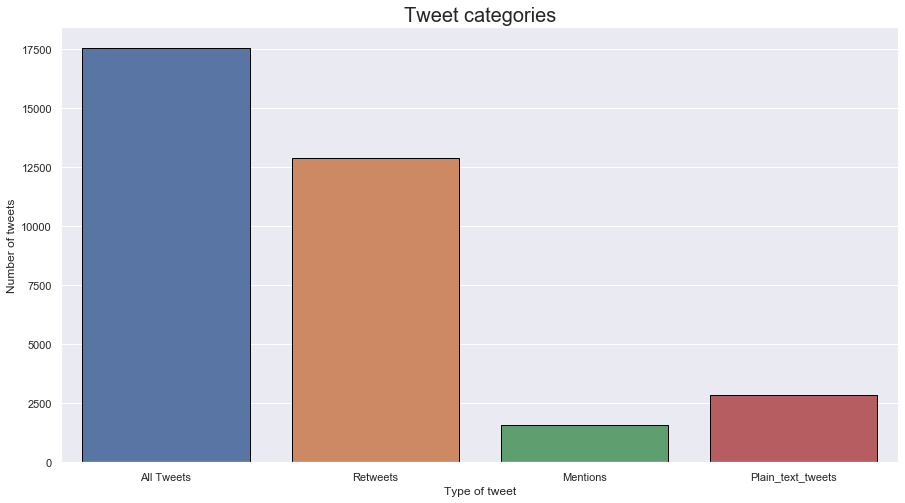

In [15]:
#Now we will plot all the different categories. Note  that the reply
#tweets are inside the mention tweets

len_list=[len(tweets),len(RT_tweets),len(mention_tweets),len(plain_text_tweets)]
item_list=['All Tweets','Retweets','Mentions','Plain_text_tweets']
plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
plt.title('Tweet categories',fontsize=20)
plt.xlabel('Type of tweet')
plt.ylabel('Number of tweets')
sns.barplot(x=item_list,y=len_list,edgecolor='black',linewidth=1)

plt.show()

In [18]:
import re

def word_in_text(word,text):
    word=word.lower()
    text=text.lower()
    match=re.search(word,text)
    if match:
        return True
    return False

tweets['cancer']=tweets['text'].apply(lambda tweet: word_in_text('cancer',tweet))
tweets['malaria']=tweets['text'].apply(lambda tweet: word_in_text('malaria',tweet))
tweets['Ebola']=tweets['text'].apply(lambda tweet: word_in_text('Ebola',tweet))
tweets['AIDS']=tweets['text'].apply(lambda tweet: word_in_text('AIDS',tweet))
tweets['COVID19']=tweets['text'].apply(lambda tweet: word_in_text('COVID19',tweet))
#tweets['HIV']=tweets['text'].apply(lambda tweet: word_in_text('HIV',tweet))
#tweets['corona_virus']=tweets['text'].apply(lambda tweet: word_in_text('corona_virus',tweet))

print(tweets['cancer'].value_counts()[True])
print(tweets['malaria'].value_counts()[True])
print(tweets['Ebola'].value_counts()[True])
print(tweets['AIDS'].value_counts()[True])
print(tweets['COVID19'].value_counts()[True])
#print(tweets['HIV'].value_counts()[True])
#print(tweets['corona_virus'].value_counts()[True])


3788
170
644
328
6396


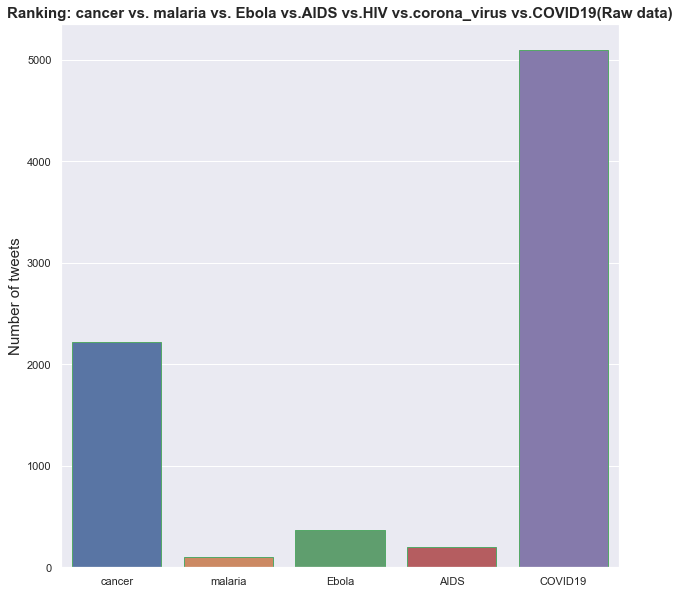

In [61]:
prg_diseases=['cancer','malaria','Ebola','AIDS','COVID19']
tweets_by_prg_diseases=[tweets['cancer'].value_counts()[True],tweets['malaria'].value_counts()[True],tweets['Ebola'].value_counts()[True],tweets['AIDS'].value_counts()[True],tweets['COVID19'].value_counts()[True]]

x_pos=list(range(len(prg_diseases)))
width=0.8
fig, ax = plt.subplots(figsize = (10,10))
sns.barplot(x=x_pos,y=tweets_by_prg_diseases,linewidth=1,alpha=1,edgecolor='g')

#Setting axis labels and ticks
ax.set_ylabel('Number of tweets',fontsize=15)
ax.set_title('Ranking: cancer vs. malaria vs. Ebola vs.AIDS vs.HIV vs.corona_virus vs.COVID19(Raw data)', fontsize=15, fontweight='bold')
#ax.set.xtick([p+0.4*width for p in x_pos])
ax.set_xticklabels(prg_diseases)
plt.show()